## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of funtionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.



In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_circles

#5000 samples
num_samples= 5000
X, y = make_circles(5000,
                    noise=0.03,
                    random_state=42)

In [3]:
X[:5], y[:5]

(array([[-0.75016489, -0.56389205],
        [ 0.78974434,  0.12875006],
        [ 0.74764022,  0.3065477 ],
        [-0.88825043,  0.48969296],
        [-0.16605281,  0.95530293]]),
 array([0, 1, 1, 0, 0], dtype=int64))

In [19]:
X_train = X[:4500]
y_train =y[:4500]
X_test = X[4500:]
y_test = y[4500:]

Define the model

In [21]:
tf.random.set_seed(888)

model_lr = tf.keras.models.Sequential([
    tf.keras.layers.Dense( 100, activation="relu"),
    tf.keras.layers.Dense( 10, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid" )
])

model_lr.compile( loss = tf.keras.losses.BinaryCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                  metrics = ["accuracy"])

model_lr.fit( X_train, y_train, epochs=20, verbose=0)
model_lr.evaluate(X_test, y_test)

C:\Users\bruni\OneDrive\Desktop\Pyton\env_tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


16/16 [==============================] - 1s 2ms/step - loss: 0.0108 - accuracy: 0.9960


[0.010790522210299969, 0.9959999918937683]

C:\Users\bruni\OneDrive\Desktop\Pyton\env_tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


16/16 [==============================] - 0s 1ms/step - loss: 0.0108 - accuracy: 0.9960


[0.010790522210299969, 0.9959999918937683]

Define the **callback** for the best laerning rate

In [28]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch/20))

model_lr_best = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation= "relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])

model_lr_best.compile( loss= tf.keras.losses.BinaryCrossentropy(),
                       optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                       metrics= ["accuracy"])

hystory_lr_best = model_lr_best.fit( X_train,
                     y_train,
                     callbacks=[lr_schedule],
                     epochs= 100,
                     verbose =0)


In [13]:
hystory_lr_best.history.keys()

dict_keys(['loss', 'accuracy', 'lr'])

Plot the  history values

<AxesSubplot: >

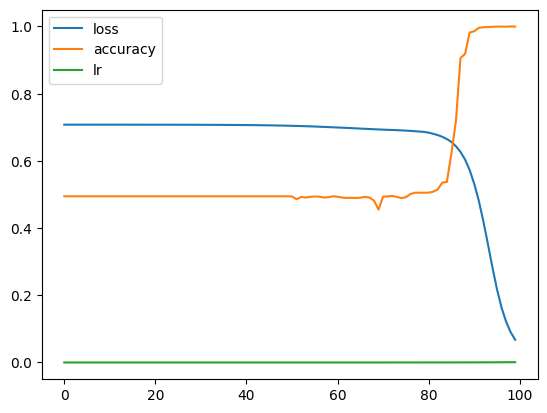

In [29]:
import pandas as pd
pd.DataFrame(hystory_lr_best.history).plot()

Can't see how ut finish

In [31]:
history_lr_best= model_lr_best.fit(X_train,
                  y_train,
                  callbacks=[lr_schedule],
                  epochs=150,
                  verbose=0)

<AxesSubplot: >

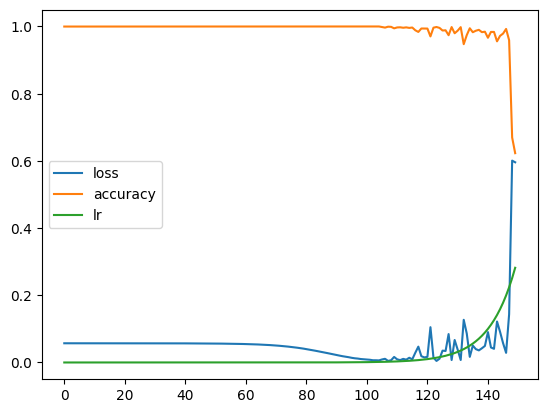

In [33]:
pd.DataFrame(history_lr_best.history).plot()

Isolate the loss curve

Text(0, 0.5, 'Loss')

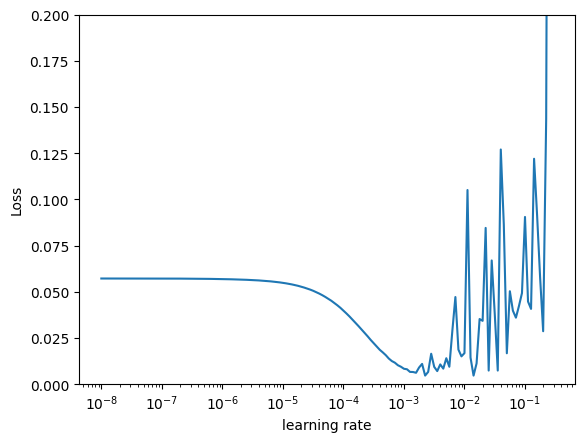

In [42]:
x_axis= [1e-8 * 10**(e/20) for e in range(150) ]
plt.semilogx(x_axis,history_lr_best.history.get("loss"))
plt.ylim(0, 0.2)
plt.xlabel("learning rate")
plt.ylabel("Loss")


Text(0, 0.5, 'Loss')

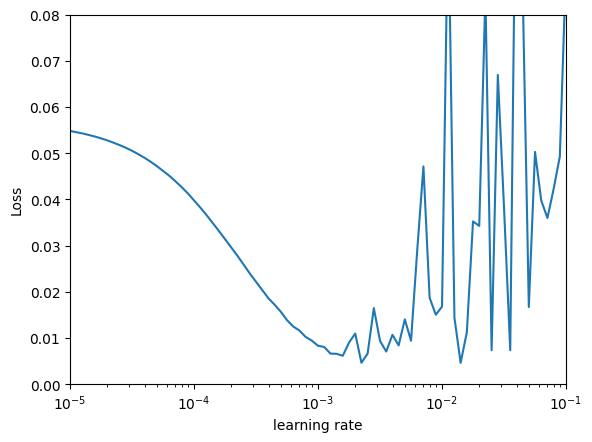

In [44]:
x_axis= [1e-8 * 10**(e/20) for e in range(150) ]
plt.semilogx(x_axis,history_lr_best.history.get("loss"))
plt.ylim(0, 0.08)
plt.xlim(1e-5, 1e-1)
plt.xlabel("learning rate")
plt.ylabel("Loss")


Let's try at 10-4, 10-3 and  10-2

In [85]:
EPOCHS_TRAIN= 50

In [86]:
model_lr_best.compile( loss= tf.keras.losses.BinaryCrossentropy(),
                       optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
                       metrics= ["accuracy"])
hystory_lr_10_4 = model_lr_best.fit( X_train,y_train, epochs= EPOCHS_TRAIN,verbose =0, )
model_lr_best.evaluate(X_test,y_test)

16/16 [==============================] - 0s 1ms/step - loss: 1.4772e-04 - accuracy: 1.0000


[0.00014772370923310518, 1.0]

313/313 [==============================] - 0s 934us/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


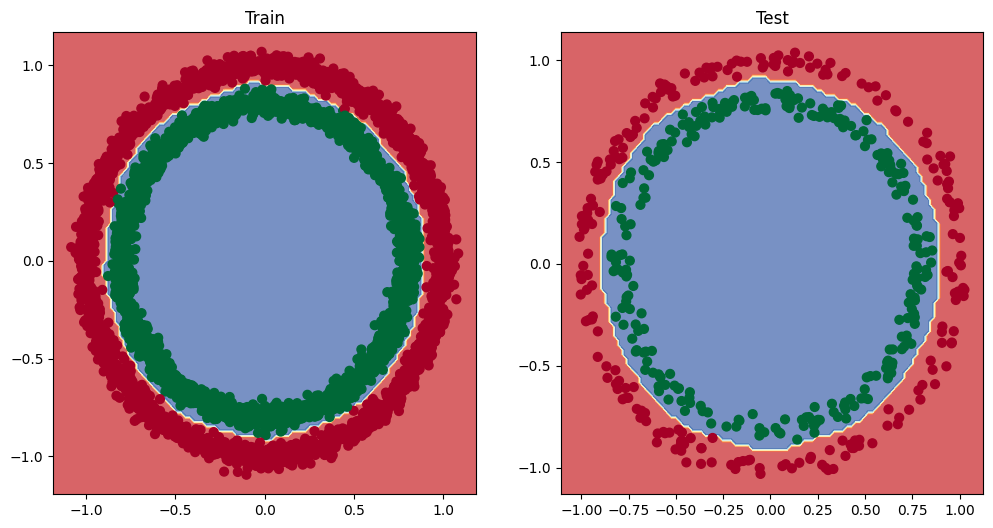

In [87]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_lr_best, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_lr_best, X=X_test, y=y_test)
plt.show()

In [88]:
model_lr_best.compile( loss= tf.keras.losses.BinaryCrossentropy(),
                       optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics= ["accuracy"])
hystory_lr_10_3 = model_lr_best.fit( X_train,y_train, epochs= EPOCHS_TRAIN,verbose =0)
model_lr_best.evaluate(X_test,y_test)

16/16 [==============================] - 0s 1ms/step - loss: 3.9995e-05 - accuracy: 1.0000


[3.9995433326112106e-05, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


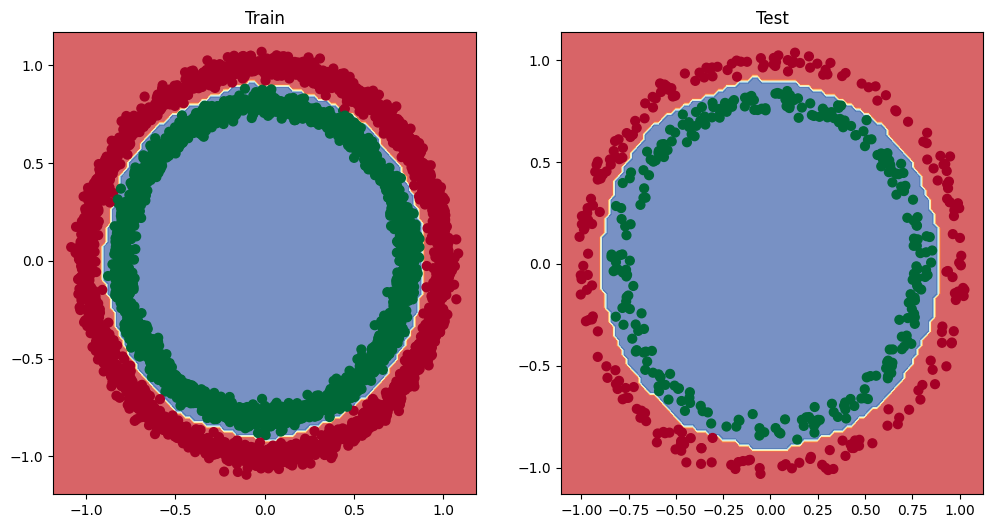

In [89]:

# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_lr_best, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_lr_best, X=X_test, y=y_test)
plt.show()

In [90]:
model_lr_best.compile( loss= tf.keras.losses.BinaryCrossentropy(),
                       optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                       metrics= ["accuracy"])
hystory_lr_10_2 = model_lr_best.fit( X_train,y_train, epochs= EPOCHS_TRAIN,verbose =0)
model_lr_best.evaluate(X_test,y_test)

16/16 [==============================] - 0s 1ms/step - loss: 7.7976e-05 - accuracy: 1.0000


[7.797647413099185e-05, 1.0]

313/313 [==============================] - 0s 955us/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


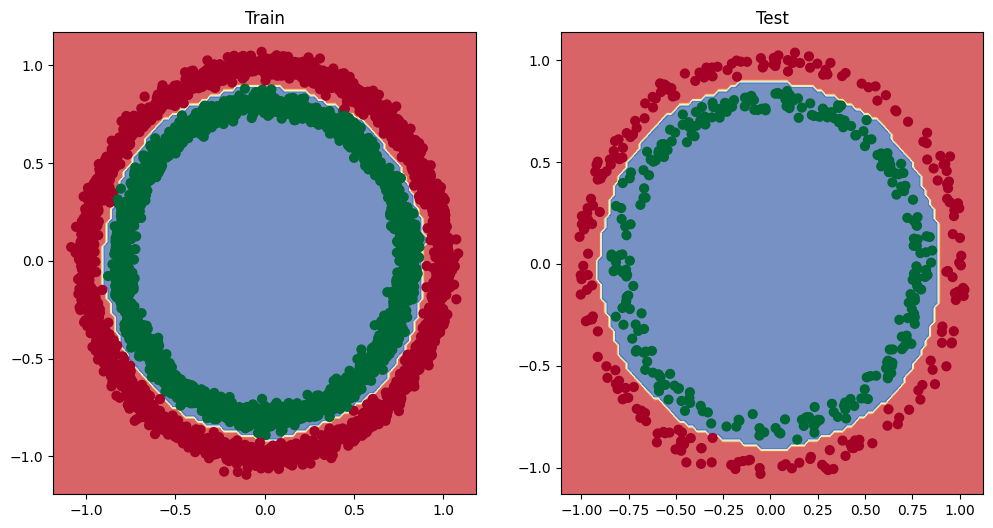

In [91]:

# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_lr_best, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_lr_best, X=X_test, y=y_test)
plt.show()

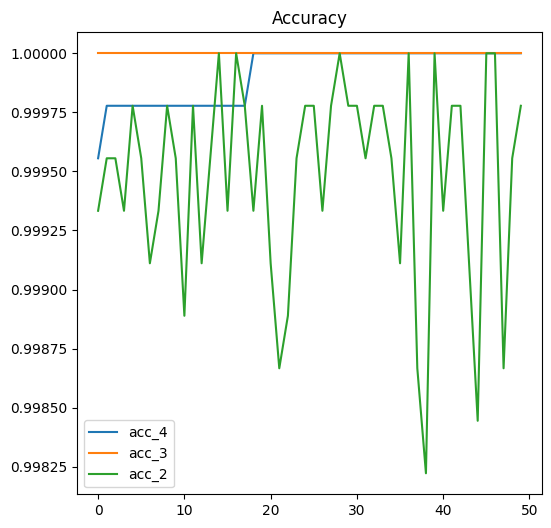

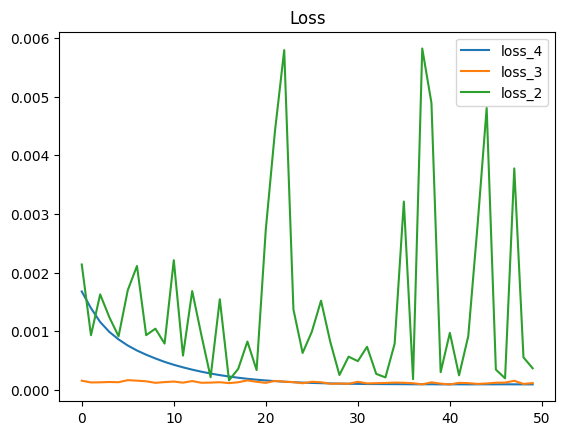

In [92]:
acc_4, loss_4   = hystory_lr_10_4.history["accuracy"], hystory_lr_10_4.history["loss"]
acc_3, loss_3   = hystory_lr_10_3.history["accuracy"],hystory_lr_10_3.history["loss"]
acc_2, loss_2   = hystory_lr_10_2.history["accuracy"],hystory_lr_10_2.history["loss"]
plt.figure(figsize=(6,6))
plt.title("Accuracy")
plt.plot(acc_4, label="acc_4")
plt.plot(acc_3, label="acc_3")
plt.plot(acc_2, label="acc_2")
plt.legend()
plt.show()
plt.title("Loss")
plt.plot(loss_4, label="loss_4")
plt.plot(loss_3, label="loss_3")
plt.plot(loss_2, label="loss_2")
plt.legend()

plt.show()

Looking at the metrics
**loss 10-4** seems the best learning rate becuse the loss curve is descending
**loss 10-2** seems no bad, but learning rate seems ascending  descending


In [64]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function was inspired by two resources:
     1. https://cs231n.github.io/neural-networks-case-study/
     2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlGn)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


In [ ]:

# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)